In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import  mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler,RobustScaler
from sklearn.linear_model import Lasso, Ridge, SGDRegressor, LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,ExtraTreesRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor


In [42]:
df=pd.read_csv('cars_info.csv')
df.head(10)

,ID,Name,Price,Brand,Model,Variant,Series,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity
0,11530130,2010 Toyota Rukus Build 2 AZE151R,9999,Toyota,Rukus,Build 2,AZE151R,2010,263000,Wagon,Automatic,Unleaded Petrol,Used,2362,Grey,5
1,12190570,2021 Mercedes-Benz V 250 D Avantgarde MWB 447 ...,117990,Mercedes-Benz,V,250 D Avantgarde MWB,447 MY21,2021,19,Wagon,Automatic,Diesel,New In Stock,2143,Black,7
2,12321855,2021 Mercedes-Benz Valente 116 CDI MWB RWD 447...,79990,Mercedes-Benz,Valente,116 CDI MWB RWD,447 MY21,2021,24,Wagon,Automatic,Diesel,New In Stock,2143,Black,8
3,12346971,2010 Mercedes-Benz E250 CDI Avantgarde 207,34990,Mercedes-Benz,E250,CDI Avantgarde,207,2010,120579,Cabriolet,Automatic,Diesel,Used,2143,Black,4
4,12363884,2016 Holden Cruze CD JH MY16,15990,Holden,Cruze,CD,JH MY16,2016,72506,Sportswagon,Automatic,Unleaded Petrol,Used,1796,White,5
5,12366036,2017 Nissan X-Trail ST (4WD) T32 Series 2,26800,Nissan,X-Trail,ST (4WD),T32 Series 2,2017,121870,Wagon,Automatic,Unleaded Petrol,Used,2488,White,5
6,12370057,2016 Ford Territory TX (rwd) SZ MK2,23990,Ford,Territory,TX (rwd),SZ MK2,2016,154136,Wagon,Automatic,Diesel,Used,2720,White,5
7,12381448,2011 BMW 325I Exclusive E90 MY11,18990,BMW,325I,Exclusive,E90 MY11,2011,117306,Sedan,Automatic,Premium Unleaded Petrol,Used,2497,Grey,5
8,12382945,2005 Holden Statesman International WL,15490,Holden,Statesman,International,WL,2005,172151,Sedan,Automatic,Unleaded Petrol,Used,5665,Blue,5
9,12382946,2003 Holden Commodore Berlina Vyii,15490,Holden,Commodore,Berlina,Vyii,2003,186990,Sedan,Automatic,Unleaded Petrol,Used,5665,Green,5


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17048 entries, 0 to 17047
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                17048 non-null  int64 
 1   Name              17048 non-null  object
 2   Price             17048 non-null  int64 
 3   Brand             17048 non-null  object
 4   Model             17048 non-null  object
 5   Variant           17048 non-null  object
 6   Series            17048 non-null  object
 7   Year              17048 non-null  int64 
 8   Kilometers        17048 non-null  int64 
 9   Type              17048 non-null  object
 10  Gearbox           17048 non-null  object
 11  Fuel              17048 non-null  object
 12  Status            17048 non-null  object
 13  CC                17048 non-null  int64 
 14  Color             17048 non-null  object
 15  Seating Capacity  17048 non-null  int64 
dtypes: int64(6), object(10)
memory usage: 2.1+ MB


In [44]:
df.isnull().sum()

ID                  0
Name                0
Price               0
Brand               0
Model               0
Variant             0
Series              0
Year                0
Kilometers          0
Type                0
Gearbox             0
Fuel                0
Status              0
CC                  0
Color               0
Seating Capacity    0
dtype: int64

- There is no null values

In [45]:
df.duplicated().sum()

0

- There is no Duplicated rows

# Univariate Analysis

### Price Column

In [46]:
df.Price.describe()

count     17048.000000
mean      36777.778038
std       30305.015328
min        1000.000000
25%       18800.000000
50%       29990.000000
75%       45990.000000
max      999000.000000
Name: Price, dtype: float64

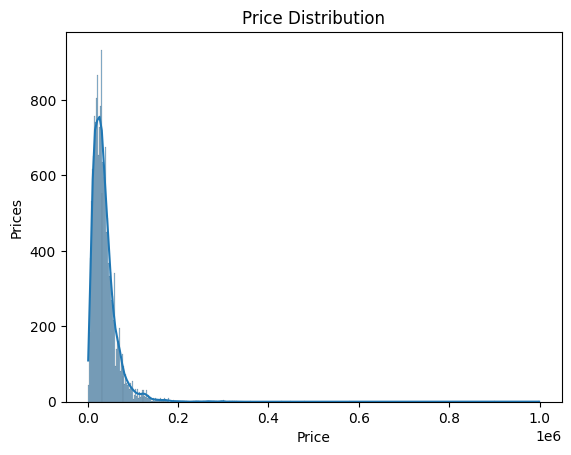

In [47]:
sns.histplot(x=df['Price'],kde=True)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel('Prices')
plt.show()

### Brand Column

In [48]:
df.Brand.value_counts()

Brand
Toyota             2768
Holden             1505
Ford               1490
Mazda              1167
Hyundai            1087
Mitsubishi         1074
Volkswagen         1019
Nissan             1008
Kia                 744
Subaru              655
Mercedes-Benz       625
Audi                518
BMW                 480
Honda               413
Jeep                379
Land Rover          273
Isuzu               267
Lexus               180
Volvo               161
Skoda               160
Suzuki              160
Renault             158
LDV                 122
MG                   97
Porsche              91
Mini                 66
Peugeot              45
Chrysler             42
Jaguar               38
HSV                  37
GWM                  29
Great Wall           27
Ram                  23
Fiat                 17
Dodge                14
Citroen              13
Alfa Romeo           11
Ssangyong            11
Infiniti              9
Maserati              8
Chevrolet             7
Bentley   

C:\Users\George Hany\AppData\Local\Temp\ipykernel_13440\165256121.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Brand', order=df['Brand'].value_counts().index,palette='viridis')


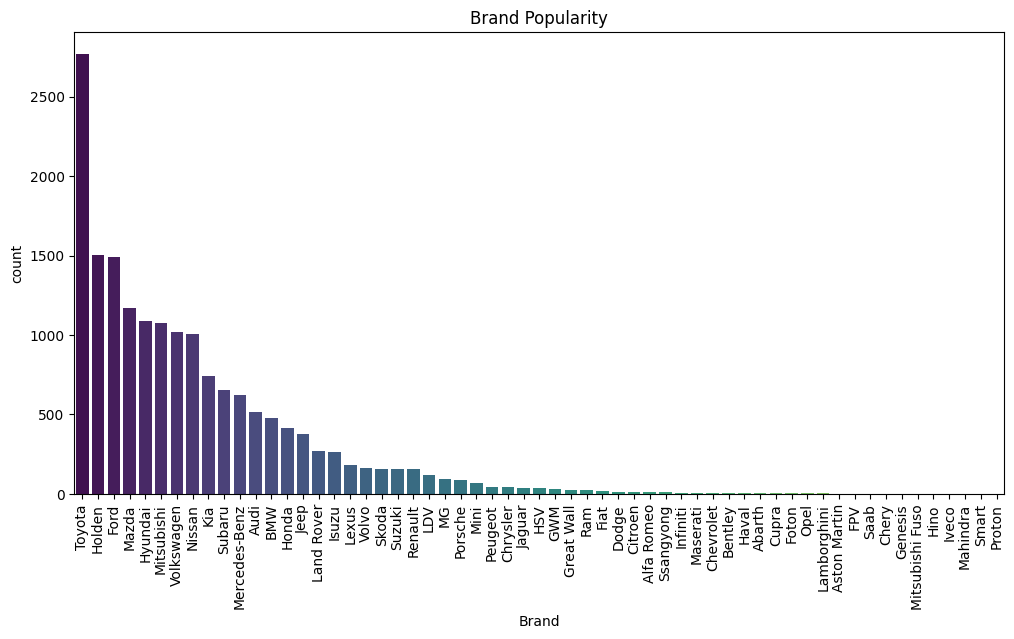

In [49]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Brand', order=df['Brand'].value_counts().index,palette='viridis')
plt.title('Brand Popularity')
plt.xticks(rotation=90)
plt.show()

- The most Brand car avaiable is Toyota

### Year Column

In [50]:
df.Year.describe()

count    17048.000000
mean      2015.481288
std          4.721591
min       1989.000000
25%       2013.000000
50%       2016.000000
75%       2019.000000
max       2022.000000
Name: Year, dtype: float64

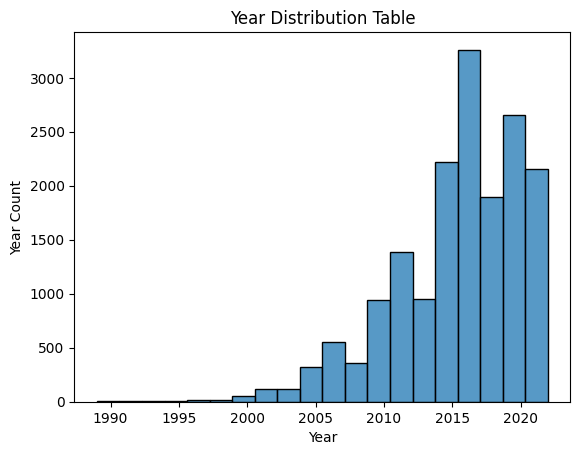

In [51]:
sns.histplot(x=df['Year'],bins=20)
plt.title("Year Distribution Table")
plt.xlabel("Year")
plt.ylabel('Year Count')
plt.show()

- The most car manufacture year is 2015 and it averages between 2015 to 2019

### Kilometers Column

In [52]:
df.Kilometers.describe()

count    1.704800e+04
mean     1.032314e+05
std      8.041313e+04
min      1.000000e+00
25%      4.450225e+04
50%      8.845400e+04
75%      1.488735e+05
max      2.700000e+06
Name: Kilometers, dtype: float64

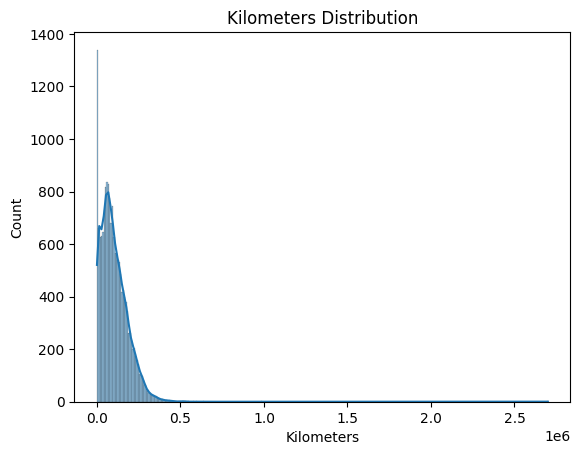

In [81]:
sns.histplot(x=df['Kilometers'],kde=True)
plt.title("Kilometers Distribution")
plt.xlabel("Kilometers")
plt.ylabel('Count')
plt.show()

### Type Column

In [53]:
df.Type.value_counts()

Type
Wagon                    7768
Hatchback                2424
Sedan                    2325
Dual Cab Utility          657
Coupe                     471
Double Cab Pick Up        425
Cab Chassis               424
Dual Cab Pick-up          423
Van                       384
Crew Cab Pickup           269
Double Cab Utility        212
Crew Cab Utility          207
Utility                   178
Sportswagon               143
Double Cab Chassis         95
Crew Cab Chassis           77
Dual Cab Chassis           72
Convertible                44
Sportback                  43
Liftback                   40
Hardtop                    36
Fastback                   36
Cabriolet                  35
Softtop                    35
Super Cab Utility          23
Space Cab Chassis          22
Bus                        21
Super Cab Chassis          19
Saloon                     13
X Cab Pickup               13
Roadster                   13
Freestyle Cab Chassis      11
Space Cab Utility          10
X Cab

C:\Users\George Hany\AppData\Local\Temp\ipykernel_13440\2450984563.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Type', order=df['Type'].value_counts().index,palette='viridis')


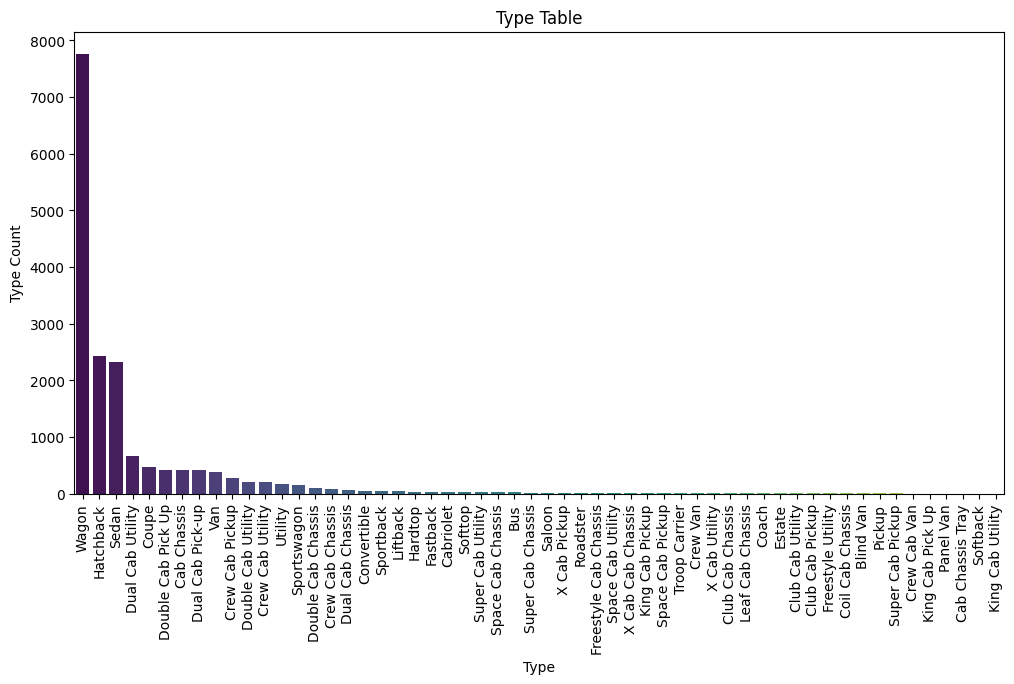

In [54]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Type', order=df['Type'].value_counts().index,palette='viridis')
plt.xticks(rotation=90)
plt.title("Type Table")
plt.xlabel("Type")
plt.ylabel('Type Count')
plt.show()

- Most Cars were Type wagon

## Gearbox Column

In [55]:
df.Gearbox.value_counts()

Gearbox
Automatic    14578
Manual        2446
AWD             13
Front            8
Rear             3
Name: count, dtype: int64

C:\Users\George Hany\AppData\Local\Temp\ipykernel_13440\3671645891.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Automatic','Manual','AWD','Front','Rear'],y=df.Gearbox.value_counts(),palette='viridis')


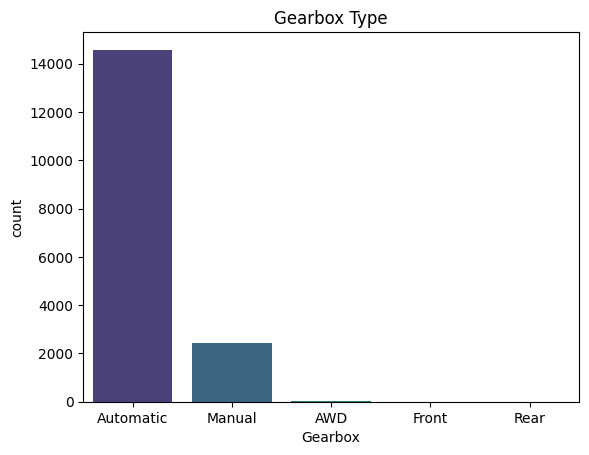

In [56]:
sns.barplot(x=['Automatic','Manual','AWD','Front','Rear'],y=df.Gearbox.value_counts(),palette='viridis')
plt.title("Gearbox Type")
plt.xlabel("Gearbox")
plt.show()

- Most Cars have Automatic Gearbox

### Fuel Column

In [57]:
count=df.Fuel.value_counts()
count

Fuel
Unleaded Petrol              7016
Diesel                       6087
Premium Unleaded Petrol      3438
Unleaded Petrol/Electric      255
Premium Unleaded/Electric     194
Liquid Petroleum Gas           40
Diesel/Electric                18
Name: count, dtype: int64

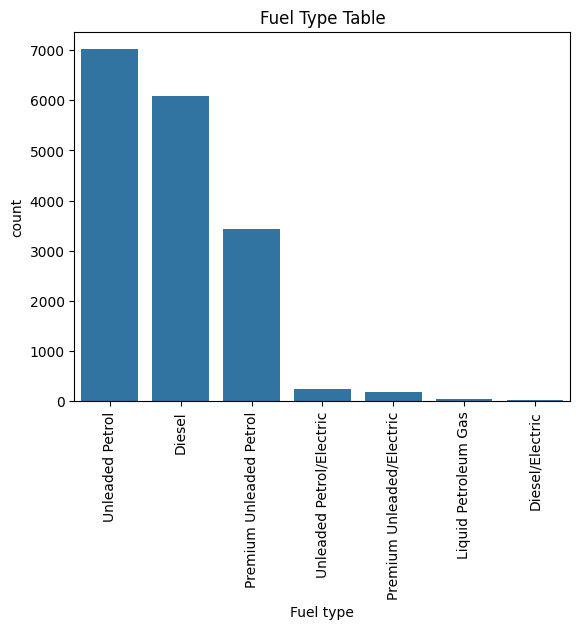

In [58]:
sns.barplot(x=['Unleaded Petrol','Diesel','Premium Unleaded Petrol','Unleaded Petrol/Electric','Premium Unleaded/Electric','Liquid Petroleum Gas','Diesel/Electric'],y=count)
plt.xticks(rotation=90)
plt.title('Fuel Type Table')
plt.xlabel('Fuel type')
plt.show()

- Most cars have Unleaded Petrol and Diesel Fuel type

### Status Column

In [59]:
count=df.Status.value_counts()
count

Status
Used            16304
Demo              387
New In Stock      357
Name: count, dtype: int64

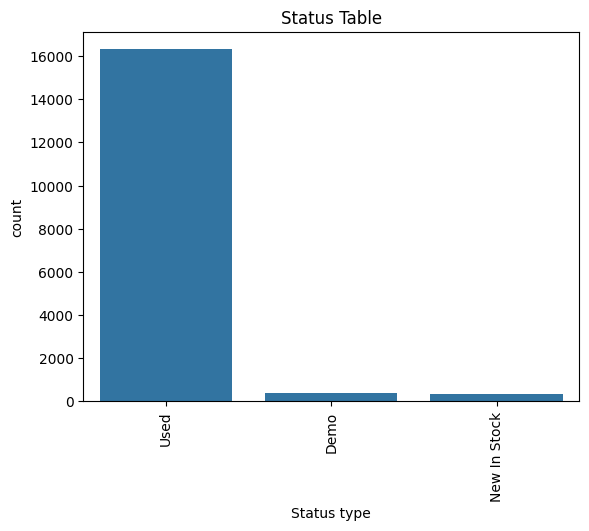

In [60]:
sns.barplot(x=['Used','Demo','New In Stock'],y=count)
plt.xticks(rotation=90)
plt.title('Status Table')
plt.xlabel('Status type')
plt.show()

- The most Cars status is Used 

### Color Column

In [61]:
count=df.Color.value_counts()
count

Color
White       6177
Silver      2452
Grey        2441
Black       1970
Blue        1577
            ... 
Hornet         1
selenite       1
Daytona        1
Amber          1
Glazier        1
Name: count, Length: 235, dtype: int64

- Most Cars Color are White

### Seating Capacity

In [62]:
count=df['Seating Capacity'].value_counts()
count

Seating Capacity
5     12826
7      2177
2       744
4       653
3       305
8       297
6        20
14       19
9         4
11        3
Name: count, dtype: int64

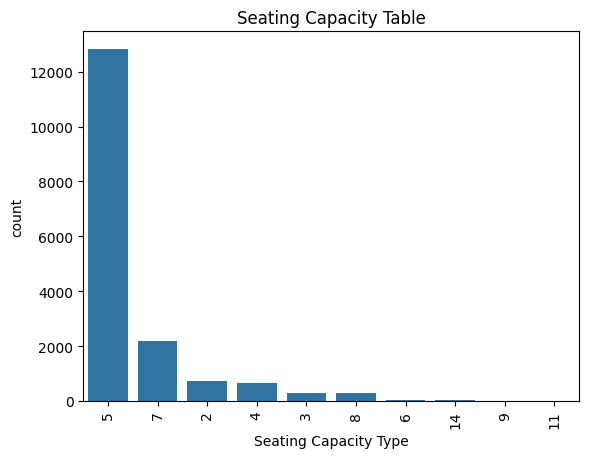

In [63]:
sns.barplot(x=['5','7','2','4','3','8','6','14','9','11'],y=count)
plt.xticks(rotation=90)
plt.title('Seating Capacity Table')
plt.xlabel('Seating Capacity Type')
plt.show()

- Most Cars Seating Capacity have 5 seats

## MultiVariate Analysis

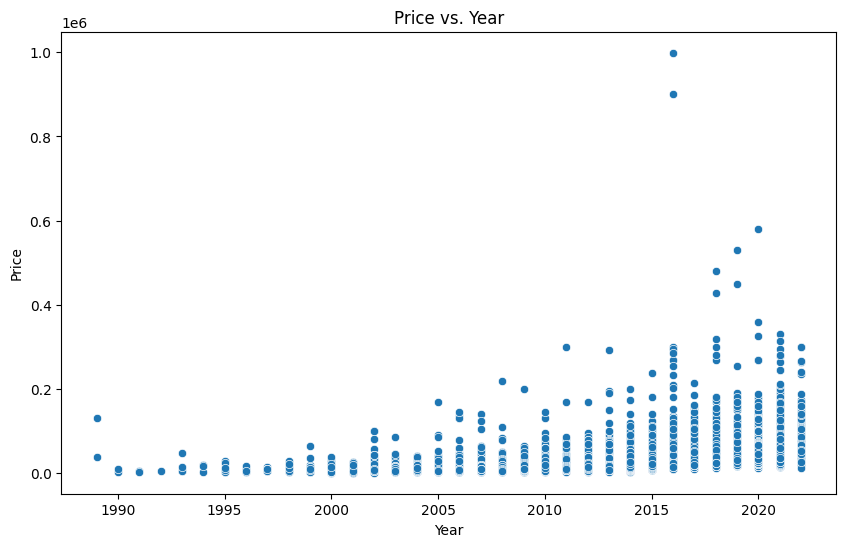

In [64]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Year', y='Price')
plt.title('Price vs. Year')
plt.show()

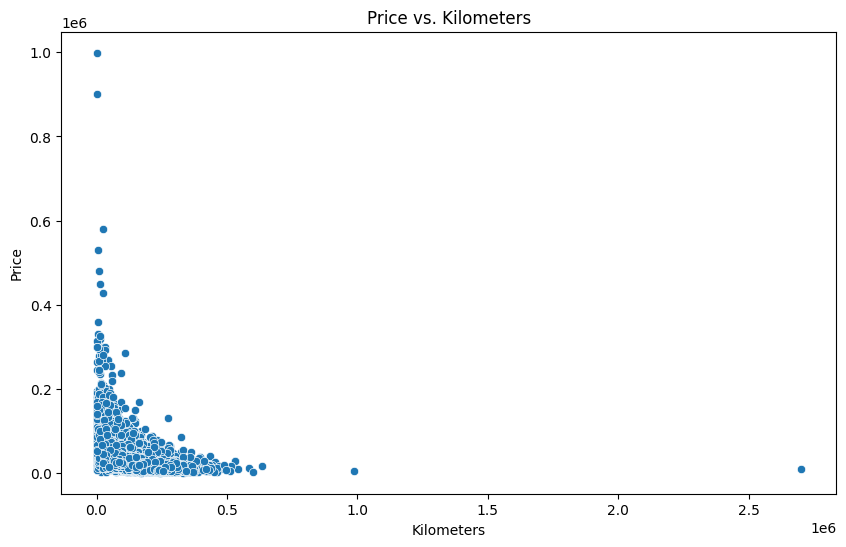

In [65]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Kilometers', y='Price')
plt.title('Price vs. Kilometers')
plt.show()

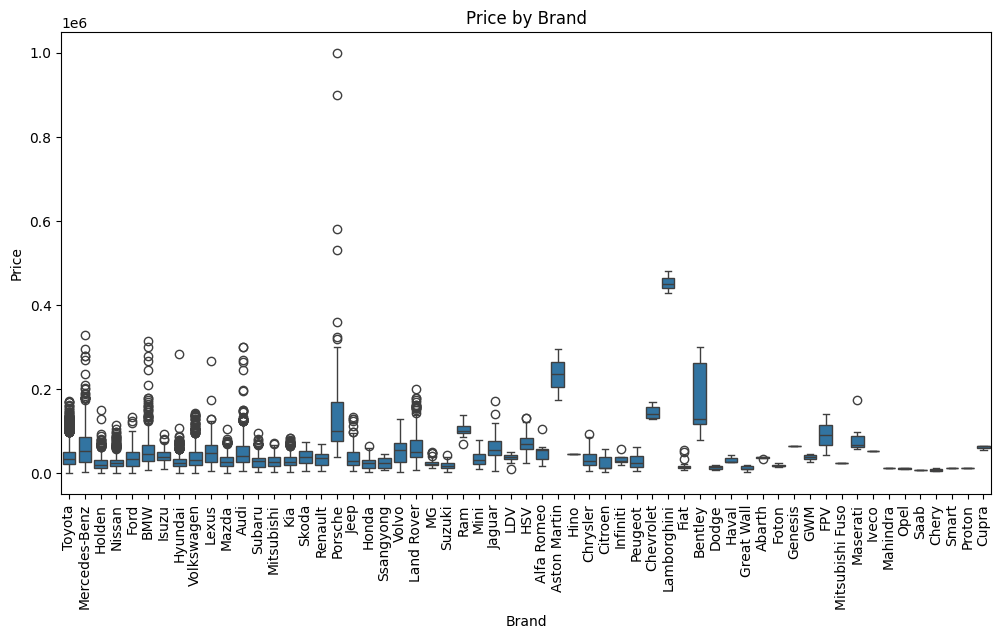

In [66]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Brand', y='Price')
plt.title('Price by Brand')
plt.xticks(rotation=90)
plt.show()

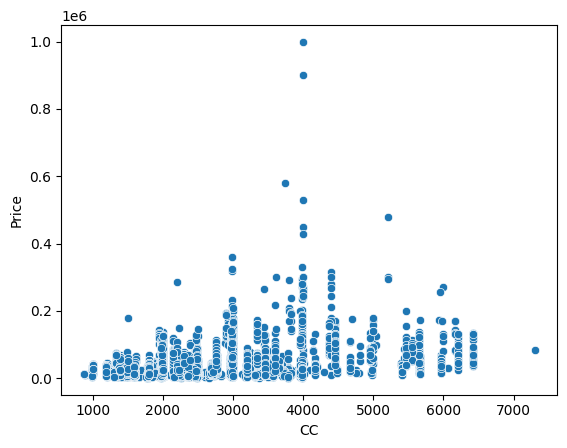

In [67]:
sns.scatterplot(df, x='CC', y='Price')
plt.show()

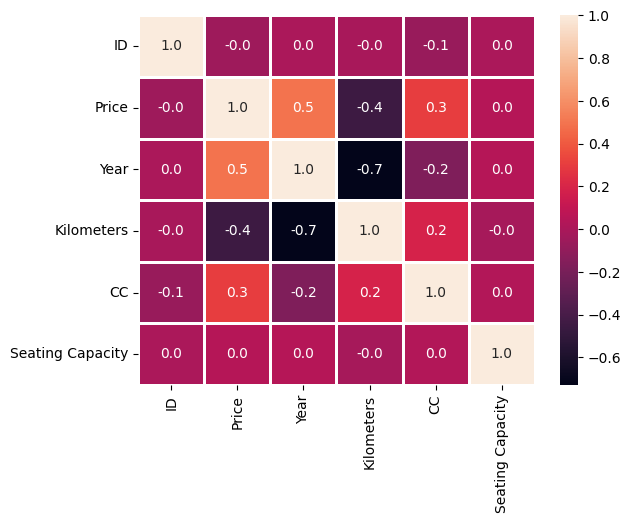

In [68]:
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.1f', linewidths=1)
plt.show()

# Machine Learning

### Preproccessing

In [69]:
df.corr(numeric_only=True)

,ID,Price,Year,Kilometers,CC,Seating Capacity
ID,1.000000,-0.047978,0.004708,-0.011543,-0.070773,0.005320
Price,-0.047978,1.000000,0.488033,-0.447490,0.298205,0.046629
Year,0.004708,0.488033,1.000000,-0.728515,-0.174578,0.044151
Kilometers,-0.011543,-0.447490,-0.728515,1.000000,0.185219,-0.013088
CC,-0.070773,0.298205,-0.174578,0.185219,1.000000,0.029590
Seating Capacity,0.005320,0.046629,0.044151,-0.013088,0.029590,1.000000


In [70]:
df.drop(columns=['ID','Name','Series','Brand','Model','Variant'],inplace=True)

### Encoding and Scalling

In [71]:
encoder= LabelEncoder()
df['Type']=encoder.fit_transform(df['Type'])
df['Gearbox']=encoder.fit_transform(df['Gearbox'])
df['Fuel']=encoder.fit_transform(df['Fuel'])
df['Status']=encoder.fit_transform(df['Status'])
df['Color']=encoder.fit_transform(df['Color'])


In [72]:
scaler= StandardScaler()
df['Type'] = scaler.fit_transform(df[['Type']])
df['Gearbox'] = scaler.fit_transform(df[['Gearbox']])
df['Fuel'] = scaler.fit_transform(df[['Fuel']])
df['Status'] = scaler.fit_transform(df[['Status']])
df['CC'] = scaler.fit_transform(df[['CC']])
df['Color'] = scaler.fit_transform(df[['Color']])
df['Seating Capacity'] = scaler.fit_transform(df[['Seating Capacity']])
df['Year'] = scaler.fit_transform(df[['Year']])


<Axes: >

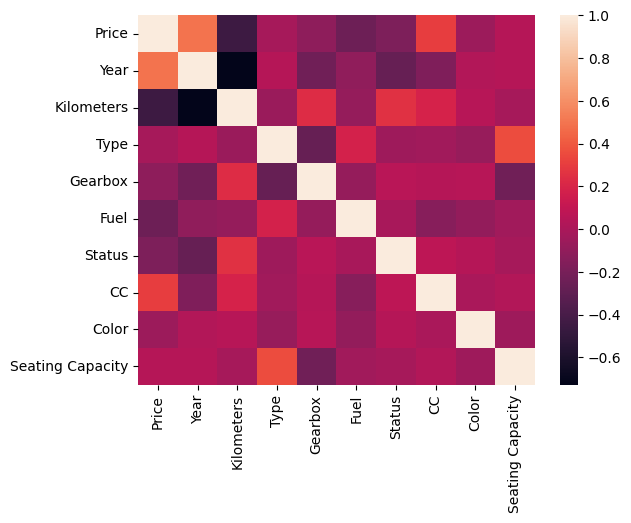

In [73]:
sns.heatmap(df.corr())

### Defining

In [74]:
X=df.drop(columns=['Price'])
y=df.Price

In [75]:
X

,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity
0,-1.160932,263000,0.880323,-0.408504,0.984797,0.202490,-0.147207,-0.714527,-0.103275
1,1.168859,19,0.880323,-0.408504,-1.257180,-2.849724,-0.395517,-1.533394,1.679641
2,1.168859,24,0.880323,-0.408504,-1.257180,-2.849724,-0.395517,-1.533394,2.571099
3,-1.160932,120579,-2.316030,-0.408504,-1.257180,0.202490,-0.395517,-1.533394,-0.994733
4,0.109863,72506,0.414188,-0.408504,0.984797,0.202490,-0.788959,0.950054,-0.103275
...,...,...,...,...,...,...,...,...,...
17043,-2.643527,230441,-0.051947,-0.408504,0.984797,0.202490,1.473049,-0.795071,-0.103275
17044,-1.584531,237113,-0.717854,2.436337,0.984797,0.202490,-1.352477,1.017174,-0.103275
17045,-2.855326,238768,0.880323,-0.408504,-1.257180,0.202490,0.575049,-0.795071,1.679641
17046,0.109863,49800,-0.717854,2.436337,0.984797,0.202490,-0.787825,-1.519969,-0.103275


In [76]:
y

0          9999
1        117990
2         79990
3         34990
4         15990
          ...  
17043      4499
17044      4999
17045      7999
17046     14000
17047      5999
Name: Price, Length: 17048, dtype: int64

### Models train and Results 

In [77]:
models = {
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'SGDRegressor': SGDRegressor(),
    'LinearRegression': LinearRegression(),
    'SVR': SVR(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'BaggingRegressor': BaggingRegressor(),
    'ExtraTreesRegressor': ExtraTreesRegressor(),
    'AdaBoostRegressor': AdaBoostRegressor(),
    'XGBRegressor': XGBRegressor(),
    'CatBoostRegressor': CatBoostRegressor(verbose=False),
    'LGBMRegressor': LGBMRegressor()
}

In [78]:
X_train,X_valid,y_train,y_valid=train_test_split(X,y,test_size=0.2,shuffle=True,random_state=7)


In [79]:
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_valid)
    
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_valid, y_valid)
    mse = mean_squared_error(y_valid, y_test_pred)
    
    results.append({
        'Model': name,
        'Train Score': train_score * 100,
        'Test Score': test_score * 100,
        'Mean Squared Error': mse
    })

results_df = pd.DataFrame(results)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000299 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 697
[LightGBM] [Info] Number of data points in the train set: 13638, number of used features: 9
[LightGBM] [Info] Start training from score 36574.191377


In [80]:
results_df

,Model,Train Score,Test Score,Mean Squared Error
0,Lasso,4.698363e+01,4.093740e+01,6.174789e+08
1,Ridge,4.698363e+01,4.093745e+01,6.174784e+08
2,SGDRegressor,-3.554417e+29,-2.943503e+29,3.077330e+36
3,LinearRegression,4.698363e+01,4.093734e+01,6.174795e+08
4,SVR,-3.577197e-01,-1.504095e+00,1.061190e+09
5,KNeighborsRegressor,4.282221e+01,1.743730e+01,8.631644e+08
6,DecisionTreeRegressor,9.998656e+01,6.754350e+01,3.393214e+08
7,RandomForestRegressor,9.723751e+01,7.937861e+01,2.155895e+08
8,BaggingRegressor,9.509758e+01,7.584635e+01,2.525180e+08
9,ExtraTreesRegressor,9.998655e+01,8.533671e+01,1.532996e+08
